## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
data = pd.read_csv('C:/Users/Администратор/data.csv', encoding = 'utf-8')
display(data.head())

,registryNum,approveDate,publishDate,fullName,shortName,createReason,approveReason,unfairSupplier_fullName,unfairSupplier_type,unfairSupplier_firmName,unfairSupplier_inn,unfairSupplier_kpp,purchase_purchaseNumber,purchase_purchaseObjectInfo,purchase_protocolDate,contract_price,contract_currency_id,state
0,РНП.77083-16,2016-09-06 03:00:00+03,2016-09-06 03:00:00+03,КОМИТЕТ ПО СТРОИТЕЛЬСТВУ,NaN,CANCEL_CONTRACT,Решение ФАС России от 11.08.2016 по делу № Р-7...,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖИНИРИНГОВАЯ КОРПОРАЦИ...",U,NaN,7701038654,774501001.0,1.722000e+17,Выполнение работ по корректировке проектной до...,2013-11-01,1.229146e+10,RUB,PUBLISHED
1,РНП.223787-19,2019-10-11 03:00:00+03,2019-10-11 03:00:00+03,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ГЛАВНОЕ УПР...","МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ГЛАВНОЕ УПР...",CANCEL_CONTRACT,Решение ФАС России от 30.09.2019 № 19/44/104/200,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ\nОТВЕТСТВЕННОСТЬЮ ""СК\...",U,"ООО ""СК ""УС-620""",7730533438,770501001.0,1.322000e+17,95К-1-14. Открытый конкурс с ограниченным учас...,NaN,1.039622e+10,RUB,PUBLISHED
2,РНП.213774-19,2019-04-12 03:00:00+03,2019-04-12 03:00:00+03,"ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ДИРЕКЦИЯ ГОСУ...","ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ДИРЕКЦИЯ ГОСУ...",CANCEL_CONTRACT,Решение ФАС России от 21.03.2019 № 19/44/104/46,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",U,"ООО ""СТРОЙНОВАЦИЯ""",7710512373,772501001.0,3.731001e+17,Выполнение строительных работ с разработкой ра...,2014-11-18,1.016891e+10,RUB,PUBLISHED
3,РНП.229468-19,2019-12-24 03:00:00+03,2019-12-24 03:00:00+03,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,CANCEL_CONTRACT,Решение ФАС России от 19.12.2019 № 19/44/104/266,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БОЛЬ...",U,"ООО ""БОЛЬВЕРК""",6381012469,631701001.0,NaN,NaN,NaN,7.418641e+09,RUB,PUBLISHED
4,РНП.138777-18,2018-11-26 03:00:00+03,2018-11-26 03:00:00+03,"ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ФЕДЕРАЛЬНОЕ У...","ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ФЕДЕРАЛЬНОЕ У...",CANCEL_CONTRACT,Решение Арбитражного суда Московской области о...,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",U,"ООО ""СТРОЙНОВАЦИЯ""",7710512373,772501001.0,3.481000e+17,На право заключения государственного контракта...,2012-07-26,7.282163e+09,RUB,PUBLISHED


In [3]:
def information_about_df(data):
    print("Размер таблицы: ", data.shape)
    print()
    print("Название колонок:", data.columns)
    print()
    display(data.head())
    print()
    print(data.info())
    print()
    print(data.isnull().sum())
    print()
    display(data.describe())
    print()
    print("Дубликаты: ", data.duplicated().sum())
    

In [4]:
information_about_df(data)

Размер таблицы:  (33036, 18)

Название колонок: Index(['registryNum', 'approveDate', 'publishDate', 'fullName', 'shortName',
       'createReason', 'approveReason', 'unfairSupplier_fullName ',
       'unfairSupplier_type ', 'unfairSupplier_firmName ',
       'unfairSupplier_inn ', 'unfairSupplier_kpp ',
       'purchase_purchaseNumber ', 'purchase_purchaseObjectInfo ',
       'purchase_protocolDate ', 'contract_price ', 'contract_currency_id ',
       'state '],
      dtype='object')



,registryNum,approveDate,publishDate,fullName,shortName,createReason,approveReason,unfairSupplier_fullName,unfairSupplier_type,unfairSupplier_firmName,unfairSupplier_inn,unfairSupplier_kpp,purchase_purchaseNumber,purchase_purchaseObjectInfo,purchase_protocolDate,contract_price,contract_currency_id,state
0,РНП.77083-16,2016-09-06 03:00:00+03,2016-09-06 03:00:00+03,КОМИТЕТ ПО СТРОИТЕЛЬСТВУ,NaN,CANCEL_CONTRACT,Решение ФАС России от 11.08.2016 по делу № Р-7...,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖИНИРИНГОВАЯ КОРПОРАЦИ...",U,NaN,7701038654,774501001.0,1.722000e+17,Выполнение работ по корректировке проектной до...,2013-11-01,1.229146e+10,RUB,PUBLISHED
1,РНП.223787-19,2019-10-11 03:00:00+03,2019-10-11 03:00:00+03,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ГЛАВНОЕ УПР...","МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ГЛАВНОЕ УПР...",CANCEL_CONTRACT,Решение ФАС России от 30.09.2019 № 19/44/104/200,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ\nОТВЕТСТВЕННОСТЬЮ ""СК\...",U,"ООО ""СК ""УС-620""",7730533438,770501001.0,1.322000e+17,95К-1-14. Открытый конкурс с ограниченным учас...,NaN,1.039622e+10,RUB,PUBLISHED
2,РНП.213774-19,2019-04-12 03:00:00+03,2019-04-12 03:00:00+03,"ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ДИРЕКЦИЯ ГОСУ...","ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ДИРЕКЦИЯ ГОСУ...",CANCEL_CONTRACT,Решение ФАС России от 21.03.2019 № 19/44/104/46,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",U,"ООО ""СТРОЙНОВАЦИЯ""",7710512373,772501001.0,3.731001e+17,Выполнение строительных работ с разработкой ра...,2014-11-18,1.016891e+10,RUB,PUBLISHED
3,РНП.229468-19,2019-12-24 03:00:00+03,2019-12-24 03:00:00+03,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,CANCEL_CONTRACT,Решение ФАС России от 19.12.2019 № 19/44/104/266,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БОЛЬ...",U,"ООО ""БОЛЬВЕРК""",6381012469,631701001.0,NaN,NaN,NaN,7.418641e+09,RUB,PUBLISHED
4,РНП.138777-18,2018-11-26 03:00:00+03,2018-11-26 03:00:00+03,"ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ФЕДЕРАЛЬНОЕ У...","ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ФЕДЕРАЛЬНОЕ У...",CANCEL_CONTRACT,Решение Арбитражного суда Московской области о...,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",U,"ООО ""СТРОЙНОВАЦИЯ""",7710512373,772501001.0,3.481000e+17,На право заключения государственного контракта...,2012-07-26,7.282163e+09,RUB,PUBLISHED



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33036 entries, 0 to 33035
Data columns (total 18 columns):
registryNum                     33036 non-null object
approveDate                     33033 non-null object
publishDate                     33036 non-null object
fullName                        33036 non-null object
shortName                       27861 non-null object
createReason                    33036 non-null object
approveReason                   33033 non-null object
unfairSupplier_fullName         33036 non-null object
unfairSupplier_type             33036 non-null object
unfairSupplier_firmName         13259 non-null object
unfairSupplier_inn              33017 non-null object
unfairSupplier_kpp              23836 non-null float64
purchase_purchaseNumber         31267 non-null float64
purchase_purchaseObjectInfo     31267 non-null object
purchase_protocolDate           28050 non-null object
contract_price                  33036 non-null float64
contract_currency_id   

,unfairSupplier_kpp,purchase_purchaseNumber,contract_price
count,2.383600e+04,3.126700e+04,3.303600e+04
mean,5.506463e+08,3.517718e+17,1.129226e+07
std,2.309113e+08,2.361747e+17,1.602355e+08
min,0.000000e+00,1.011000e+17,0.000000e+00
25%,3.525010e+08,1.613000e+17,2.100000e+05
50%,6.162010e+08,3.342000e+17,6.512117e+05
75%,7.716010e+08,3.732000e+17,2.301458e+06
max,9.901010e+08,2.091700e+18,1.229146e+10



Дубликаты:  0


In [5]:
print(data['contract_currency_id '].unique())
print(data['contract_currency_id '].value_counts())
data = data[ data['contract_currency_id '] == "RUB"]

['RUB' 'USD' 'AUD' 'EUR']
RUB    33030
USD        3
EUR        2
AUD        1
Name: contract_currency_id , dtype: int64


In [6]:
#удаляем ненужные для обучния моделей столбцы (с уникальными данными)

data = data.drop(['registryNum', 'approveDate', 'fullName', 'contract_currency_id ', 'shortName','purchase_protocolDate ', 'unfairSupplier_inn ','unfairSupplier_fullName ','unfairSupplier_firmName ', 'unfairSupplier_kpp ', 'purchase_purchaseNumber '], axis = 1)


In [7]:
display(data.head())

,publishDate,createReason,approveReason,unfairSupplier_type,purchase_purchaseObjectInfo,contract_price,state
0,2016-09-06 03:00:00+03,CANCEL_CONTRACT,Решение ФАС России от 11.08.2016 по делу № Р-7...,U,Выполнение работ по корректировке проектной до...,1.229146e+10,PUBLISHED
1,2019-10-11 03:00:00+03,CANCEL_CONTRACT,Решение ФАС России от 30.09.2019 № 19/44/104/200,U,95К-1-14. Открытый конкурс с ограниченным учас...,1.039622e+10,PUBLISHED
2,2019-04-12 03:00:00+03,CANCEL_CONTRACT,Решение ФАС России от 21.03.2019 № 19/44/104/46,U,Выполнение строительных работ с разработкой ра...,1.016891e+10,PUBLISHED
3,2019-12-24 03:00:00+03,CANCEL_CONTRACT,Решение ФАС России от 19.12.2019 № 19/44/104/266,U,NaN,7.418641e+09,PUBLISHED
4,2018-11-26 03:00:00+03,CANCEL_CONTRACT,Решение Арбитражного суда Московской области о...,U,На право заключения государственного контракта...,7.282163e+09,PUBLISHED


In [8]:
data = data.query('approveReason == approveReason')

def reason(x):
    if "ФАС" in x:
        return 'фас'
    elif 'суд' in x or 'Суд' in x:
        return 'суд'
    elif 'приказ' in x or 'Приказ' in x or 'ПРИКАЗ' in x:
        return "приказ"
    elif 'решение' in x or 'Решение' in x or 'РЕШЕНИЕ' in x:
        return "решение"
    elif 'рнп' in x or 'РНП' in x:
        return "рнп"
    elif 'односторонний отказ' in x:
        return "отказ"
    else:
        return "другое"
        
data['reason'] = data['approveReason'].apply(reason)
data = data.drop(['approveReason'], axis = 1)


min: 2015-05-26 03:00:00+03:00
max: 2020-06-05 03:00:00+03:00


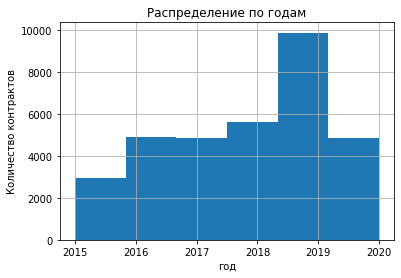

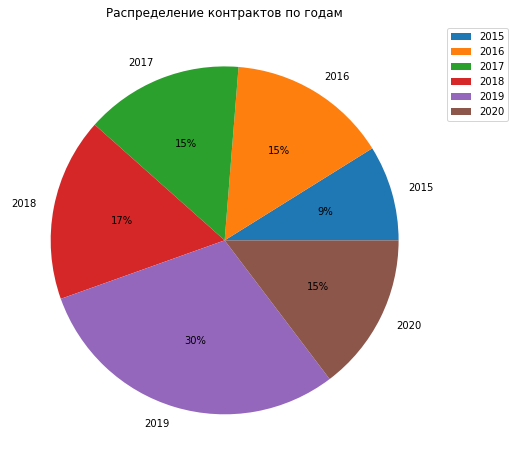

In [9]:
# колонка publishDate

data['publishDate'] = pd.to_datetime(data['publishDate'], format = '%Y-%m-%d %H:%M:%S')
print('min:', data['publishDate'].min())
print('max:', data['publishDate'].max())
data['year'] = pd.DatetimeIndex(data['publishDate']).year
data = data.drop(['publishDate'], axis = 1)

data['year'].hist(bins = 6)
plt.title('Распределение по годам')
plt.xlabel('год')
plt.ylabel('Количество контрактов')
plt.show()

data_year = data.pivot_table(index = 'year', values = 'reason', aggfunc = 'count')
data_year.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.f%%')
plt.title("Распределение контрактов по годам")
plt.ylabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

count 0: 77
10576069.00    158
300000.00      100
500000.00       88
100000.00       85
0.00            77
              ... 
3426415.18       1
960363.00        1
907890.66        1
3965328.63       1
826516.32        1
Name: contract_price , Length: 27524, dtype: int64
min: 0.0
max: 12291459673.32
mean: 11293658.12985855
median: 651000.0


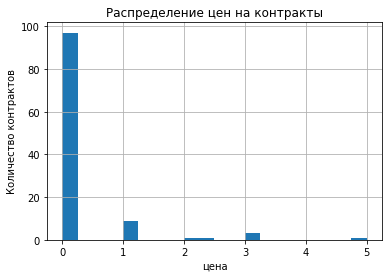

In [10]:
# колонка contract_price

print("count 0:", len(data[data['contract_price '] == 0.0]))
print(data['contract_price '].value_counts())

#data['contract_price_in_mld'] = round((data['contract_price ']/(10**6)),2)
#data = data.drop(['contract_price '], axis = 1)
print("min:", data['contract_price '].min())
print("max:", data['contract_price '].max())
print("mean:", data['contract_price '].mean())
print("median:", data['contract_price '].median())
#print("count 0:", len(data.query('contract_price_in_mld == 0.0')))

data['contract_price '].hist(bins = 20, range = (0,5))
plt.title('Распределение цен на контракты')
plt.xlabel('цена')
plt.ylabel('Количество контрактов')
plt.show()

data['purchase_purchaseObjectInfo '] = data['purchase_purchaseObjectInfo '].fillna('нет данных')

#лемматизируем текст чтобы разбить на категории (не делала, т.к. долго обрабатывается)

import pymystem3
m = pymystem3.Mystem()
lemmas=[]
def count_lemmas(data):
    lemma=[]
    for row in data['purchase_purchaseObjectInfo ']:
        text = row
        lemma.extend(m.lemmatize(text))
    return lemma
lemmas = count_lemmas(data)

from collections import Counter
print(Counter(lemmas)) 

In [11]:
data = data.drop(['purchase_purchaseObjectInfo '], axis = 1)
print(len(data['unfairSupplier_type '].unique()))
print(data['unfairSupplier_type '].unique())
print(data['unfairSupplier_type '].value_counts()) # проверяем на сбалансированность классов

4
['U' 'P' 'UF' 'PF']
U     18552
UF     8916
P      2850
PF     2709
Name: unfairSupplier_type , dtype: int64


#метод upsampling не дал положительных результатов при анализе моделей 

from sklearn.utils import shuffle
def upsample(features, target):
    features_u = features[target == 0]
    features_p = features[target == 1]
    features_uf = features[target == 2]
    features_pf = features[target == 3]
    
    target_u = target[target == 0]
    target_p = target[target == 1]
    target_uf = target[target == 2]
    target_pf = target[target == 3]

    features_upsampled = pd.concat([features_u] + [features_p] * 4 +  [features_uf] +  [features_pf] * 4)
    target_upsampled = pd.concat([target_u] + [target_p] * 4 + [target_uf] + [target_pf] * 4)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train)

In [12]:
data = data.drop(['contract_price '], axis = 1)
display(data.head())

,createReason,unfairSupplier_type,state,reason,year
0,CANCEL_CONTRACT,U,PUBLISHED,фас,2016
1,CANCEL_CONTRACT,U,PUBLISHED,фас,2019
2,CANCEL_CONTRACT,U,PUBLISHED,фас,2019
3,CANCEL_CONTRACT,U,PUBLISHED,фас,2019
4,CANCEL_CONTRACT,U,PUBLISHED,суд,2018


In [13]:
def unfairSupplier_type(x):
    if x == 'U':
        return 0
    elif x == 'P':
        return 1
    elif x == 'UF':
        return 2
    elif x =='PF':
        return 3
data['unfairSupplier_type '] = data['unfairSupplier_type '].apply(unfairSupplier_type)

data= data.rename(columns = {'state ':'state', 'unfairSupplier_type ':'unfairSupplier_type'})

data_ohe = pd.get_dummies(data, drop_first=True)

#разделение данных на выборки
def features_target(data):
    features = data.drop(['unfairSupplier_type'], axis = 1)
    target = data['unfairSupplier_type']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.4, random_state = 123)
    features_valid, features_test, target_valid, target_test= train_test_split(features_valid, target_valid, test_size = 0.5, random_state=123)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

features_train, features_valid, features_test, target_train, target_valid, target_test = features_target(data_ohe)

# нормированные данные
def features_target_std(data):
    features = data.drop(['unfairSupplier_type'], axis = 1)
    target = data['unfairSupplier_type']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.4, random_state = 123)
    features_valid, features_test, target_valid, target_test= train_test_split(features_valid, target_valid, test_size = 0.5, random_state=123)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaler = scaler.transform(features_train)
    features_valid_scaler = scaler.transform(features_valid)
    features_test_scaler = scaler.transform(features_test)
    return features_train_scaler, features_valid_scaler,features_test_scaler, target_train, target_valid, target_test

features_train_std, features_valid_std,features_test_std, target_train_std, target_valid_std, target_test_std = features_target_std(data_ohe)

In [14]:
display(data)

,createReason,unfairSupplier_type,state,reason,year
0,CANCEL_CONTRACT,0,PUBLISHED,фас,2016
1,CANCEL_CONTRACT,0,PUBLISHED,фас,2019
2,CANCEL_CONTRACT,0,PUBLISHED,фас,2019
3,CANCEL_CONTRACT,0,PUBLISHED,фас,2019
4,CANCEL_CONTRACT,0,PUBLISHED,суд,2018
...,...,...,...,...,...
33031,Расторжение контракта,2,PUBLISHED,решение,2017
33032,CANCEL_CONTRACT,0,PUBLISHED,фас,2018
33033,CANCEL_CONTRACT,0,PUBLISHED,фас,2016
33034,CANCEL_CONTRACT,1,PUBLISHED,другое,2020


### Вывод:
Я загрузила данные о недобросовестных поставщиках в рамках госзакупок, размер датасета (33036, 18), данные указаны за 2015-2020 года. Дубликатов нет, по некоторым колонкам отсутствуютданные. Т.к. для обучения моделей мне необходимо убрать данные с уникальными значениями, например, ИНН, КПП, я сначале удалю колонки, которые нам не понадобятся, а затем проведу анализ данных и дозаполню пропуски. 
Я удалила колонки: 'registryNum', 'approveDate', 'fullName', 'contract_currency_id ', 'shortName','purchase_protocolDate ', 'unfairSupplier_inn ','unfairSupplier_fullName ','unfairSupplier_firmName ', 'unfairSupplier_kpp ', 'purchase_purchaseNumber '. На основании колонки 'approveReason' я классифицировала данные и создала колонку 'reason' со значениями ('фас' 'суд' 'приказ' 'решение' 'рнп' 'другое' 'отказ'), после чего удалила колонку 'approveReason'. Далее я преобразовала колонку 'publishDate' в формат даты и проанализировала её. Больше всего контрактов было за 2019 год - 30%, затем идет 2018 г. - 17%. Создаем новую колонку 'year' и удаляем 'publishDate'. На основе колонке purchase_purchaseObjectInfo можно лемматизировать текст, чтобы выделить категории, но я этого не делала, т.к. очень долго обрабатывается. Финальная таюлица имеет размер 33027 на 6.
Я преобразовала категориальные признаки в численные техникой прямого кодирования, проверила целевой признак на сбалансированность классов: классы несбалансированны, но при апсемплинге модели показывают результаты хуже, поэтому я нестала делать преобразования. Данные я разделила на три выборки: обучающая, валидационная и тестовая в пропорции 3:1:1. Целевой признак unfairSupplier_type. Для модели логистической регрессии я нормировала признаки (т.к. у нас очень выделяется цена). 

## Анализ моделей, подбор гиперпараметров

In [15]:
#проверим адекватность на примере DummyClassifier
model = DummyClassifier(strategy="most_frequent", random_state=123)
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
print("точность DummyClassifier", model.score(features_valid, target_valid))


точность DummyClassifier 0.5489780469341408


In [16]:
# LogisticRegression
model = LogisticRegression(solver = 'liblinear', random_state = 123)
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
print("точность LogisticRegression", model.score(features_valid, target_valid))

model = LogisticRegression(solver = 'liblinear', random_state = 123)
model.fit(features_train_std, target_train_std)
predicted = model.predict(features_valid_std)
print("точность LogisticRegression при нормированных данных", model.score(features_valid_std, target_valid_std))

точность LogisticRegression 0.5489780469341408
точность LogisticRegression при нормированных данных 0.49825889477668434


In [17]:
# RandomForestClassifier
model = RandomForestClassifier(random_state = 123, max_depth=5, n_estimators = 26)
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
print("точность RandomForestClassifier", model.score(features_valid, target_valid))


точность RandomForestClassifier 0.5526116578349735


#код для подбора параметров RandomForestClassifier
n_estimatots = 0
max_depth = 0
best_score = 0
for depth in range(2,31,3):
    for n in range(2,60,3):
        model = RandomForestClassifier(random_state = 123, max_depth=depth, n_estimators = n)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        score = model.score(features_valid, target_valid)
        if best_score<score:
            best_score=score
            max_depth = depth
            n_estimators = n

model = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state = 123)
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
score = model.score(features_valid, target_valid)
print("Результаты модели RandomForestClassifier")
print("score:", score)
print("Лучшая глубина:", max_depth, " | Лучшее кол-во деревьев:", n_estimators)

In [18]:
# переименовываем колонки для LGB

features_train_lgb, features_valid_lgb, features_test_lgb, target_train_lgb, target_valid_lgb, target_test_lgb = features_target(data_ohe)

final_col = list(features_train_lgb.columns)
i = 0
for col in final_col:
    i +=1
    features_train_lgb= features_train_lgb.rename(columns = {col:str(i)+'a'})
    features_valid_lgb = features_valid_lgb.rename(columns = {col:str(i)+'a'})
    features_test_lgb = features_test_lgb.rename(columns = {col:str(i)+'a'})

In [19]:
# LGBMClassifier
model = LGBMClassifier(max_depth=3, n_estimators =17, random_state = 123, learning_rate = 0.8)
model.fit(features_train_lgb, target_train_lgb)
predicted = model.predict(features_valid_lgb)
print("точность LGBMClassifier", model.score(features_valid_lgb, target_valid_lgb))

точность LGBMClassifier 0.6310370931112793


#код для подбора параметров LGBMClassifier
itera = 0 
max_depth = 0 
best_score = 0
for depth in range(2,31,1): 
    for n in range(2,60,3): 
        model = LGBMClassifier(n_estimators =n, max_depth = depth, random_state = 123)
        model.fit(features_train_lgb, target_train_lgb) 
        predicted = model.predict(features_valid_lgb)
        score =  model.score(features_valid_lgb, target_valid_lgb)
        if best_score<score: 
            best_score=score 
            max_depth = depth 
            itera = n

model = LGBMClassifier(n_estimators =itera, max_depth = max_depth, random_state = 123) 
model.fit(features_train_lgb, target_train_lgb) 
predicted = model.predict(features_valid_lgb) 
score = model.score(features_valid_lgb, target_valid_lgb)
print("Результаты модели LGBMClassifier") 
print("score:", score)
print("Лучшая глубина:", max_depth, " | Лучшее кол-во деревьев:", itera)

## Вывод:
Модели показали следующие результаты:

точность DummyClassifier 0.54

точность LogisticRegression 0.54
точность LogisticRegression при нормированных признаках 0.49

точность LGBMClassifier 0.63

точность RandomForestClassifier 0.55

лучшие результаты на валидационных данных показала модель LGBMClassifier с параметрами (max_depth=3, n_estimators =17, random_state = 123, learning_rate = 0.8). Проверим как работают модели на тестовых данных.

## Проверка модели на тестовых данных

In [20]:
features_train = pd.concat([features_train, features_valid])
target_train = pd.concat([target_train,target_valid])

features_train_lgb = pd.concat([features_train_lgb, features_valid_lgb])
target_train_lgb = pd.concat([target_train_lgb,target_valid_lgb])

In [21]:
# LGBMClassifier
model = LGBMClassifier(max_depth=3, n_estimators =17, random_state = 123, learning_rate = 0.8)
model.fit(features_train_lgb, target_train_lgb)
predicted = model.predict(features_test_lgb)
print("точность LGBMClassifier", model.score(features_test_lgb, target_test_lgb))

# определяем важность признаков модели
importances = model.feature_importances_
feature_list = list(features_train.columns)
features_results = pd.DataFrame({'feature':feature_list, 'importance': importances})
print()
print("Важность признаков:")
display(features_results.sort_values(by = 'importance', ascending = False))

точность LGBMClassifier 0.6444141689373297

Важность признаков:


,feature,importance
0,year,156
3,createReason_WINNER_DEVIATION,70
13,reason_фас,42
4,createReason_Расторжение контракта,36
6,createReason_Уклонение победителя от заключени...,34
10,reason_решение,32
11,reason_рнп,31
9,reason_приказ,28
1,createReason_ONE_WINNER_DEVIATION,18
8,reason_отказ,9


### Вывод
точность LGBMClassifier с параметрами (max_depth=3, n_estimators =17, random_state = 123, learning_rate = 0.8) 0.65. Данная модель показала себя лучше всего. Наиболее значимые признаки: цена контракта, год, createReason. Стоит также отметить, не категоризировали столбец purchase_purchaseObjectInfo, возможно он улучшит предсказание модели.